In [27]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [28]:
df = pd.read_csv('new york crime.csv')
df = df.drop_duplicates()
df = df.fillna(0)

#print(df.head())
#print(df.shape)

In [29]:
df['Population'] = df['Population'].str.replace(',','')
pop_numeric = pd.to_numeric(df['Population'])
df['PopSquared'] = pop_numeric ** 2

#print(df['PopSquared'])


In [30]:
df['IndicateMurder'] = np.where(df['Murder and\nnonnegligent\nmanslaughter'] > 0, 1, 0)
r_numeric = pd.to_numeric(df['Robbery'], errors='coerce').fillna(0)
df['IndicateRobbery'] = np.where(r_numeric > 0, 1, 0)

df['Larceny-\ntheft'] = df['Larceny-\ntheft'].str.replace(',','')
larceny_numeric = pd.to_numeric(df['Larceny-\ntheft'])
df['IndicateLarceny'] = np.where(larceny_numeric > 0, 1, 0)

df['Burglary'] = df['Burglary'].str.replace(',','')
burglary_numeric = pd.to_numeric(df['Burglary'])
df['IndicateBurglary'] = np.where(burglary_numeric > 0, 1, 0)

df['Motor\nvehicle\ntheft'] = df['Motor\nvehicle\ntheft'].str.replace(',','')
gta_numeric = pd.to_numeric(df['Motor\nvehicle\ntheft'])
df['IndicateGTA'] = np.where(gta_numeric > 0, 1, 0)

df['IndicateArson'] = df['Arson3'].astype(int)


print(df.head())

                       City Population Violent\ncrime  \
0             Adams Village       1861              0   
1  Addison Town and Village       2577              3   
2             Akron Village       2846              3   
3                    Albany      97956            791   
4            Albion Village       6388             23   

   Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1  \
0                                       0                           0.0   
1                                       0                           0.0   
2                                       0                           0.0   
3                                       8                           0.0   
4                                       0                           0.0   

  Rape\n(legacy\ndefinition)2 Robbery Aggravated\nassault Property\ncrime  \
0                           0       0                   0              12   
1                           0       0               

In [31]:
df['Property\ncrime'] = df['Property\ncrime'].str.replace(',','')
pd.to_numeric(df['Property\ncrime'])

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = df['Property\ncrime'].values.reshape(-1, 1)
X = df[['PopSquared', 'IndicateBurglary', 'IndicateLarceny', 'IndicateGTA', 'IndicateArson']]

regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 2.00847061e-09  1.24282542e+02 -3.41207585e+01  3.25502909e+02
   7.90704269e+01]]

Intercept: 
 [-17.61544106]

R-squared:
0.989412065019866


AxesSubplot(0.125,0.125;0.62x0.755)


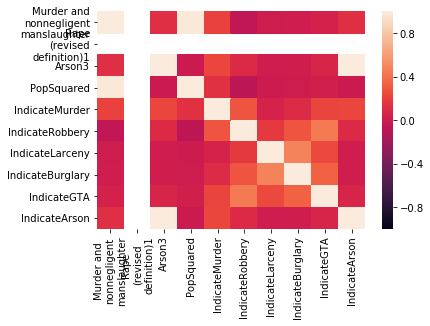

In [32]:
df_heat = sns.heatmap(df.corr(), vmin=-1, vmax=1)

print(df_heat)

In [33]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(X, Y).score(X, Y)))

With 20% Holdout: 0.02857142857142857
Testing on Sample: 0.04885057471264368


C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PV-R68G\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
